In [1]:
from BasinGeo import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
complete = pd.read_csv('EOF.csv')
data = complete.assign(dy=complete.get('nlat')-complete.get('lat'));
data = data.assign(dx=data.get('nlon')-data.get('lon'));
for i in range(1, 9):
  data[f'prev_ts{i}'] = data[f'ts{i}'].shift(1)
data['prev_dy'] = data['dy'].shift(1)
data['prev_dx'] = data['dx'].shift(1)

mask = (data['folderidx'] == data['folderidx'].shift(1)) & \
       (data['float'] == data['float'].shift(1)) & \
       (data['profileidx'] == data['profileidx'].shift(1) + 1)
data.loc[~mask, [f'prev_ts{i}' for i in range(1, 9)]] = np.nan
data = data.dropna()
data

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev_ts1,prev_ts2,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx
1,0.0,1901932.0,1.0,2021.0,5.0,30.0,-36.8170,30.9419,-38.4510,32.7565,...,-8.429544,-2.753714,-2.788564,-1.469766,-0.750992,-0.662656,-0.047516,-0.002373,2.9730,0.8784
2,0.0,1901932.0,2.0,2021.0,6.0,9.0,-38.4510,32.7565,-40.0302,35.9652,...,-16.224981,-2.328750,-2.156176,-4.411510,0.422385,-0.068476,-0.906169,-0.072356,-1.6340,1.8146
3,0.0,1901932.0,3.0,2021.0,6.0,19.0,-40.0302,35.9652,-39.2969,38.6928,...,-4.645711,-3.005418,-1.453715,-0.668177,-0.787948,-0.472165,0.048625,0.050058,-1.5792,3.2087
4,0.0,1901932.0,4.0,2021.0,6.0,29.0,-39.2969,38.6928,-38.0227,40.9031,...,-7.028408,-3.373396,-2.194893,-1.104086,-0.824606,-0.262984,0.291729,-0.280132,0.7333,2.7276
5,0.0,1901932.0,5.0,2021.0,7.0,8.0,-38.0227,40.9031,-40.4052,43.1839,...,-3.312371,-3.200434,-1.266698,-0.764814,-0.671834,-0.252487,0.113580,0.043449,1.2742,2.2103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204339,10.0,4902368.0,237.0,2023.0,1.0,4.0,47.0720,-136.2830,47.1750,-136.3350,...,10.409528,-4.377922,2.393297,-0.235289,0.186467,-0.360958,0.059349,-0.066626,0.0730,0.0070
1204340,10.0,4902368.0,238.0,2023.0,1.0,14.0,47.1750,-136.3350,47.1890,-136.2460,...,10.293234,-4.362856,2.334327,-0.217536,0.206750,-0.182417,-0.045303,-0.009744,0.1030,-0.0520
1204341,10.0,4902368.0,239.0,2023.0,1.0,24.0,47.1890,-136.2460,47.2510,-136.1430,...,10.337391,-4.000957,2.265468,-0.336982,0.131768,-0.252468,-0.002965,-0.106293,0.0140,0.0890
1204343,10.0,4902368.0,244.0,2023.0,3.0,15.0,47.1730,-135.9540,47.1160,-135.9900,...,10.810866,-3.874540,2.497401,-0.364961,0.178515,-0.303293,-0.115873,-0.044312,0.0070,-0.0530


0.5190305297589222 0.3038172573677414


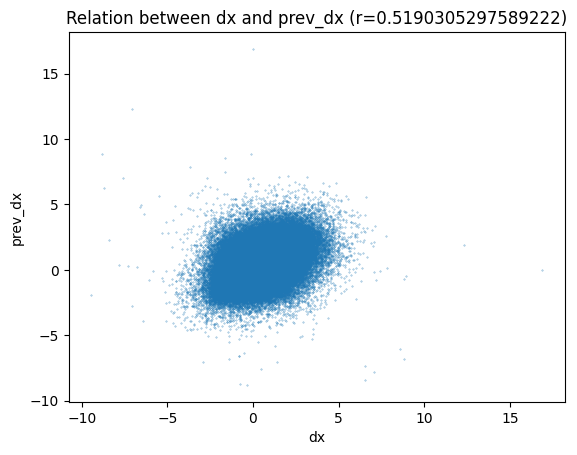

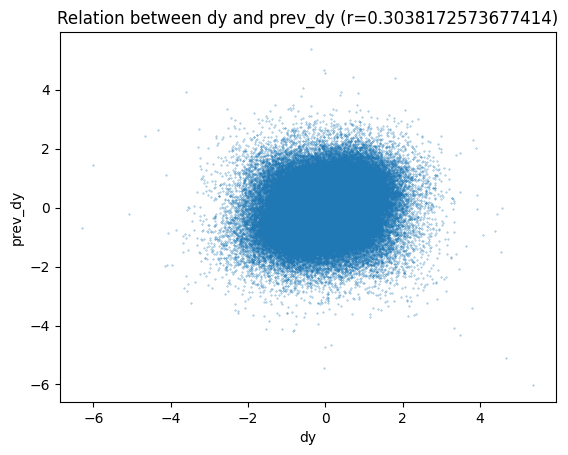

In [3]:
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
print(dx.corr(prev_dx), dy.corr(prev_dy))

plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})')
plt.xlabel('dx')
plt.ylabel('prev_dx');
plt.show()

plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})')
plt.xlabel('dy')
plt.ylabel('prev_dy');
plt.show()

In [4]:
for basin in basins.keys():
    print(basin)

Indian
NAtlantic
TropicalAtlantic
SouthAtlantic
NPacific
TropicalPacific
SouthPacific
GOM


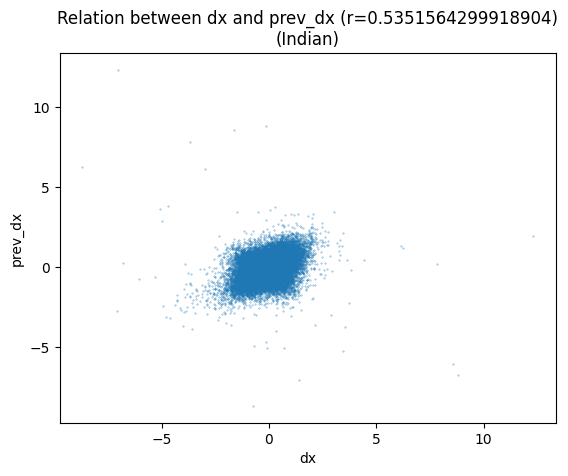

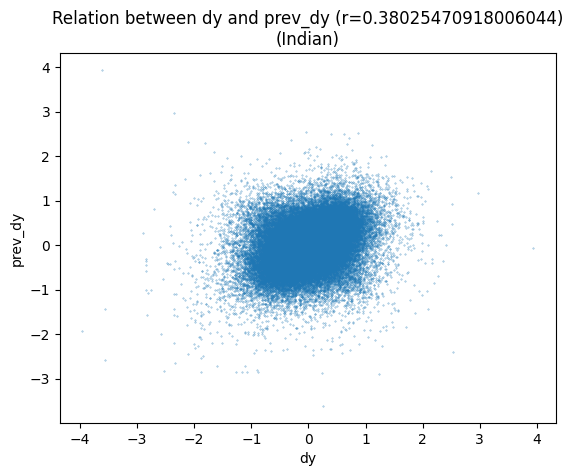

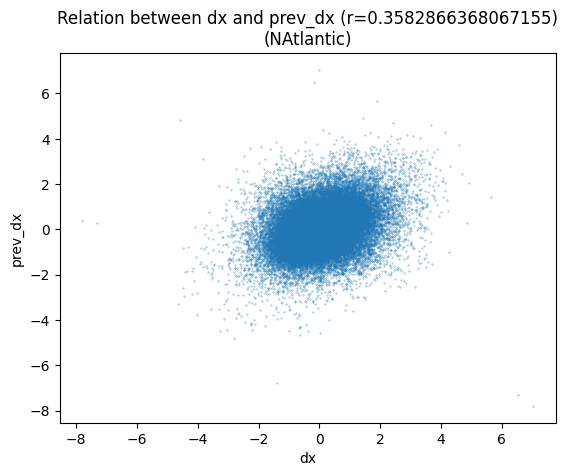

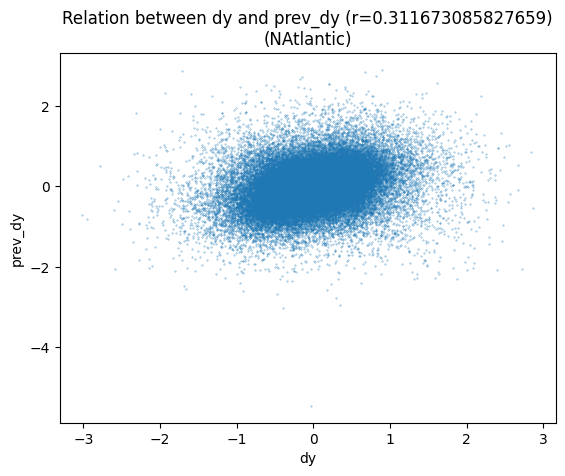

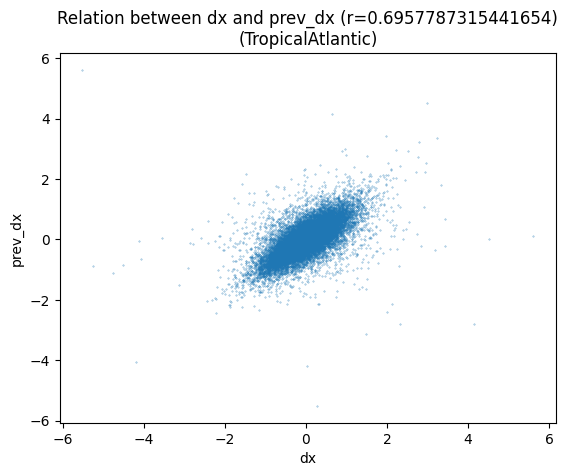

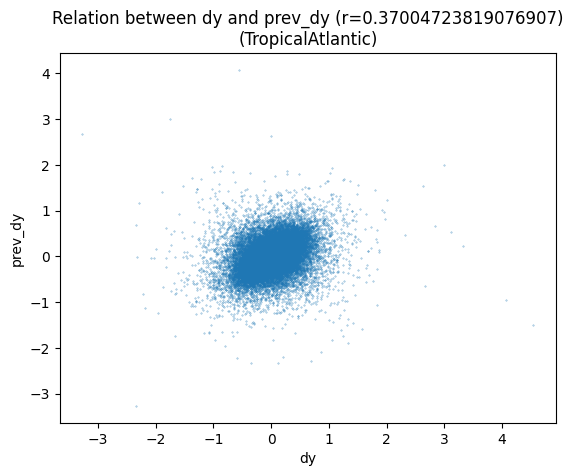

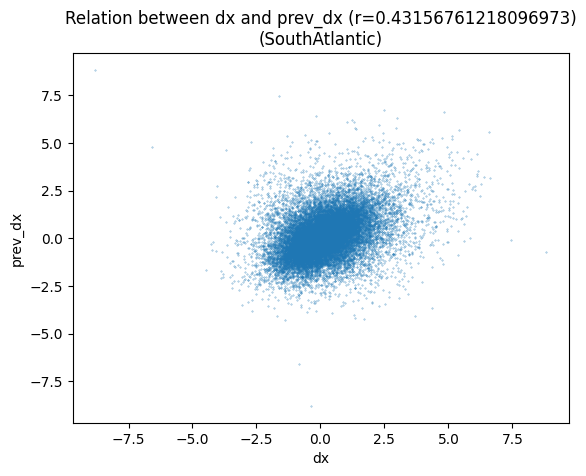

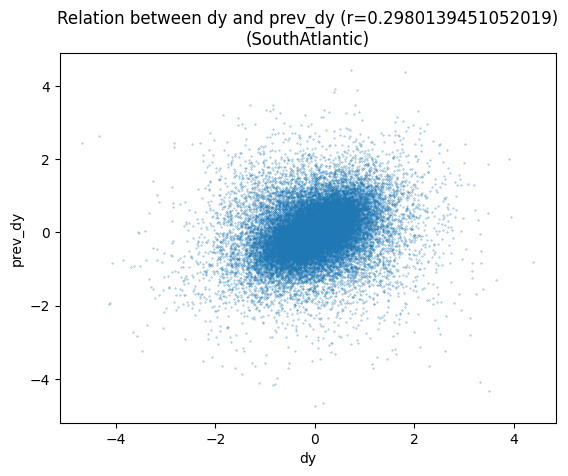

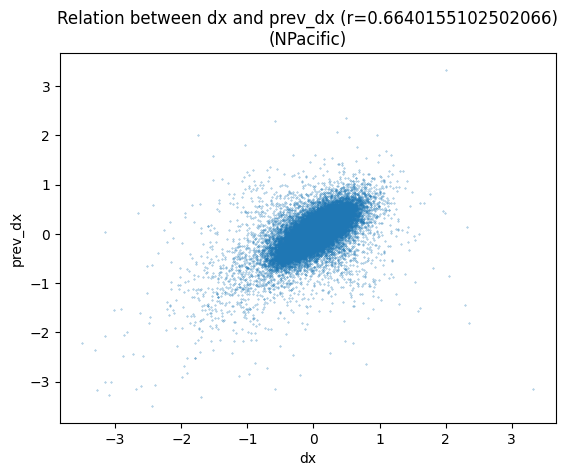

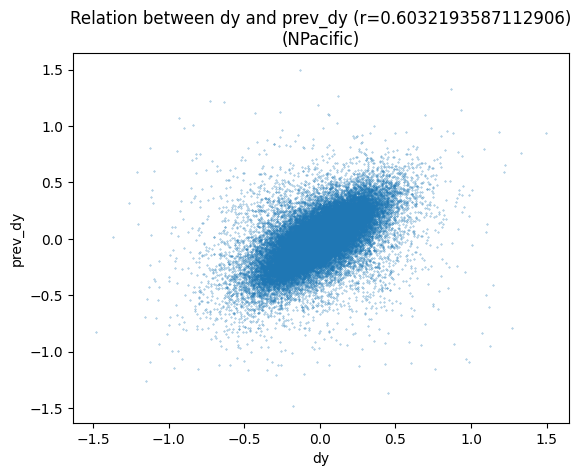

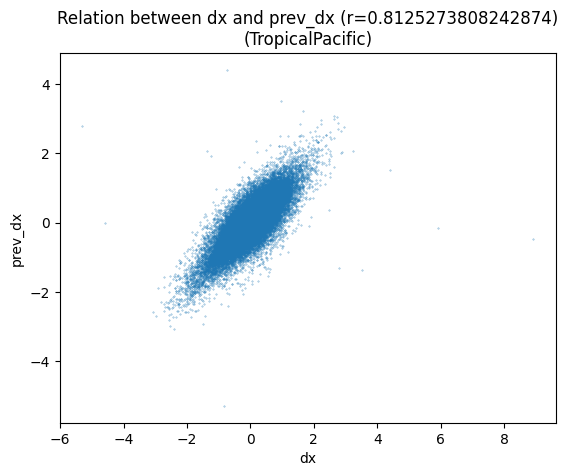

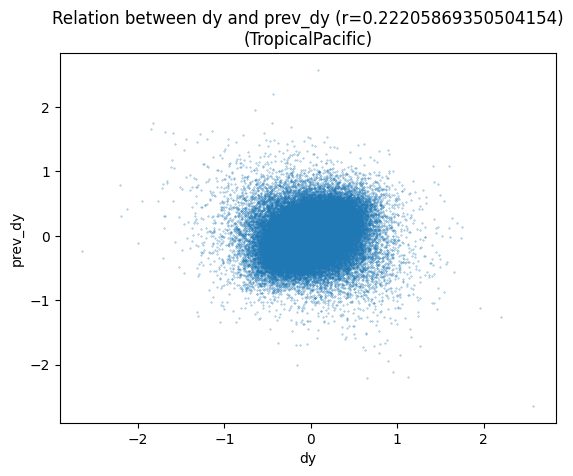

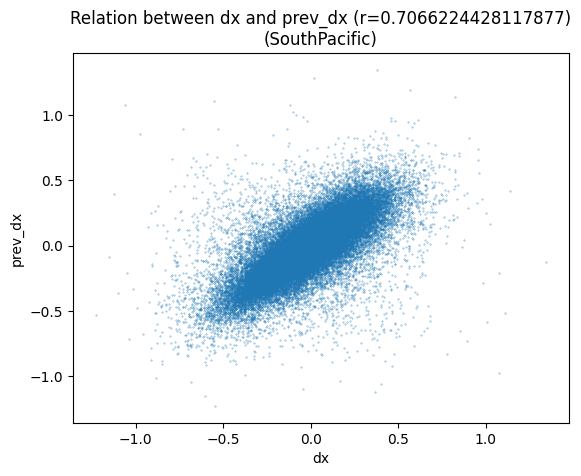

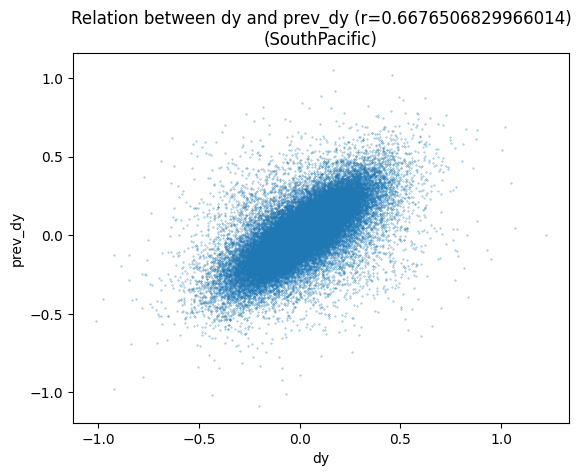

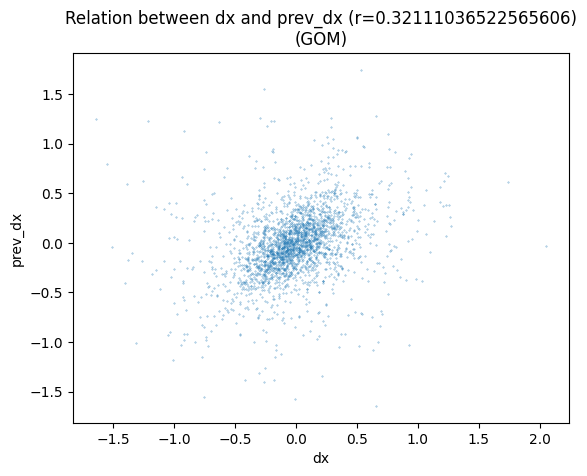

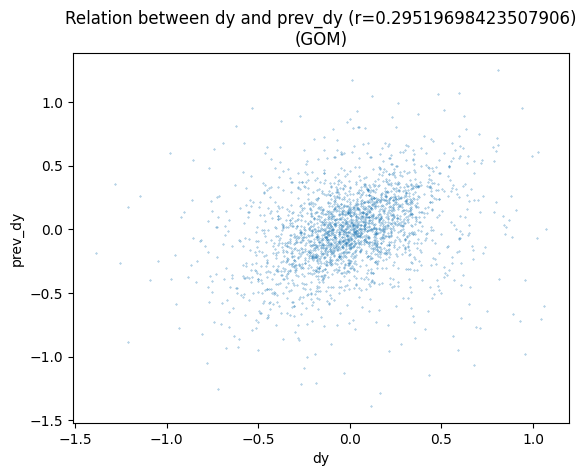

In [5]:
for basin in basins:
    chosen = shapely.Polygon(basins[basin])
    vPoint = np.vectorize(Point)
    points_list = vPoint(data['lon'], data['lat'])
    data['in_chosen_basin'] = chosen.contains(points_list)
    subset = data[data.get('in_chosen_basin') == True]

    # find correlation between prev_dx and dx
    prev_dx = subset.get('prev_dx')
    dx = subset.get('dx')
    prev_dy = subset.get('prev_dy')
    dy = subset.get('dy')

    plt.scatter(dx, prev_dx, alpha=.7, s=0.1);
    plt.title(f'Relation between dx and prev_dx (r={dx.corr(prev_dx)})\n({basin})')
    plt.xlabel('dx')
    plt.ylabel('prev_dx');
    plt.show()

    plt.scatter(dy, prev_dy, alpha=.7, s=0.1);
    plt.title(f'Relation between dy and prev_dy (r={dy.corr(prev_dy)})\n({basin})')
    plt.xlabel('dy')
    plt.ylabel('prev_dy');
    plt.show()

In [6]:
chosen = shapely.Polygon(basins['SouthPacific'])
vPoint = np.vectorize(Point)
points_list = vPoint(data['lon'], data['lat'])
data['in_chosen_basin'] = chosen.contains(points_list)
subset = data[data.get('in_chosen_basin') == True]

subset

,folderidx,float,profileidx,year,month,day,lat,lon,nlat,nlon,...,prev_ts2,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx,in_chosen_basin
89428,2.0,2902573.0,1.0,2013.0,10.0,10.0,-27.777,-109.312,-27.722,-109.147,...,-6.381664,-0.307569,1.169331,0.678437,0.630896,-0.723380,0.416301,-0.046,0.265,True
89429,2.0,2902573.0,2.0,2013.0,10.0,20.0,-27.722,-109.147,-27.461,-108.919,...,-6.740602,-0.870774,1.611743,0.820251,0.886818,-0.810814,0.542596,0.055,0.165,True
89430,2.0,2902573.0,3.0,2013.0,10.0,30.0,-27.461,-108.919,-27.396,-108.747,...,-6.598265,-0.616752,1.379309,0.782344,0.769953,-0.841099,0.628301,0.261,0.228,True
89431,2.0,2902573.0,4.0,2013.0,11.0,9.0,-27.396,-108.747,-27.184,-108.779,...,-6.036335,-0.214488,0.994610,0.597145,0.429359,-0.646446,0.456008,0.065,0.172,True
89432,2.0,2902573.0,5.0,2013.0,11.0,19.0,-27.184,-108.779,-27.197,-108.802,...,-5.911484,-0.293214,1.177932,0.583710,0.624795,-0.630760,0.529487,0.212,-0.032,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199936,10.0,5900395.0,10.0,2004.0,1.0,6.0,-31.987,-130.156,-31.823,-130.239,...,-4.911387,-0.073771,-1.082395,-0.362481,0.624399,-0.222743,0.426153,0.094,0.193,True
1199937,10.0,5900395.0,11.0,2004.0,1.0,16.0,-31.823,-130.239,-31.943,-130.363,...,-4.792071,-0.175300,-0.780688,-0.340543,0.737954,-0.338791,0.602678,0.164,-0.083,True
1199938,10.0,5900395.0,12.0,2004.0,1.0,26.0,-31.943,-130.363,-32.069,-130.205,...,-4.562668,0.259674,-1.321892,-0.436276,0.516380,-0.260359,0.592548,-0.120,-0.124,True
1199939,10.0,5900395.0,13.0,2004.0,2.0,5.0,-32.069,-130.205,-31.994,-129.943,...,-4.544283,0.092383,-1.170868,-0.446612,0.569944,-0.247247,0.543559,-0.126,0.158,True


In [7]:
subset.to_csv('SouthPacific.csv')